In [1]:
import matplotlib.patches as patches
import numpy as np

from HexDetector import hex_radius_inner_to_outer
from analysis_functions import *

set_matplotlib_style()

In [2]:
run_number = 325
pool_numbers = [2, 3, 4, 5]
# run_path = f'/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/ParameterTrees/Run{run_number}-Pool{pool_number}_treeParam.root'
# run_path = f'/data/akallits/Saclay_Analysis/data/data/2023_April_h4/processedTrees/ParameterTrees/Run{run_number}-Pool{pool_number}_treeParam.root'
run_paths = [f'/local/home/dn277127/Bureau/picosec/Run{run_number}-Pool{pool_num}_treeParam.root' for pool_num in pool_numbers]


In [3]:
trees = [get_tree(run_path, 'ParameterTree') for run_path in run_paths]

In [4]:
# event_start, event_end = 4416, None
min_ampl, max_ampl = -1, 1  # V
min_charge, max_charge = -0, 1.0 # fC
min_charge_tot, max_charge_tot = -0, 100.0  # fC
min_echarge, max_echarge = -0, 10.0  # fC
xy_range_min, xy_range_max = -100, 100  # mm
mm_saturation_voltage_buffer = 0.01 # V Place cut this much lower than max max amplitude point
chi2_quality = 3
# sat_range = None
sat_range = [-1e9, 1e9]
# sat_range = [-0.04, 1.0]

# double_peak_t_regions = None
# double_peak_t_regions = [[5.0, 5.2], [5.25, 5.35]]
double_peak_t_regions = [[-1.05, -0.96], [-0.94, -0.83]]

time_walk_nbins = 50  # For SAT vs charge
n_charge_bins = 40  # For resolution vs charge fits

mcp_min_avg_charge_per_2d_bin = 0.01
mm_min_avg_charge_per_2d_bin = 5
mcp_min_tracks_per_2d_bin = 20
mm_min_tracks_per_2d_bin = 20

time_walk_func = time_walk_double_exponential
p0_time_walk = [1.0, -0.1, 0.5, -0.1, 7] #ampl1, decay1, amp2, decay2, bsl

p0_resol = [30, -0.1, 10, -0.05, 20]
resol_func = time_walk_double_exponential
resolution_correction_to_use = 'Corrected Gaus'  # Correction to use moving forward

In [8]:
mcp_channel = 'C1'
channels = [mcp_channel]
global_vars = ['SRSNo']
channel_vars = ['hitX', 'hitY', 'npeaks']
peak_param_channel_vars = ['ampl', 'dampl', 'charge', 'echarge', 'echargefit', 'echargefixed', 'totcharge', 'totchargefixed', 'risetime', 'tfit20','tfit20_nb', 'tnaive20', 'sigmoidR[4]']

branches = []
for channel_var in channel_vars:
    branches.append(f'{channel_var}_{mcp_channel}')
for var in peak_param_channel_vars:
    branches.append(f'peakparam_{mcp_channel}/peakparam_{mcp_channel}.{var}')
for var in global_vars:
    branches.append(var)

df = None
for pool_num, tree in zip(pool_numbers, trees):
    df_mcp = get_df_branches(tree, branches)
    df_mcp.columns = [f"{col}_{pool_num}" if col != 'SRSNo' else 'SRSNo' for col in df_mcp.columns]

    if df is None:
        df = df_mcp
    else:
        df = pd.merge(df, df_mcp, on='SRSNo')


# if event_start is not None:
#     df = df[df['eventNo'] >= event_start]
# if event_end is not None:
#     df = df[df['eventNo'] <= event_end]

<Report start=0 stop=424000 source='/local/home/dn277127/Bureau/picosec/Run325-Pool2_treeParam.root:/ParameterTree;1'>
<Report start=0 stop=412800 source='/local/home/dn277127/Bureau/picosec/Run325-Pool3_treeParam.root:/ParameterTree;1'>
<Report start=0 stop=423200 source='/local/home/dn277127/Bureau/picosec/Run325-Pool4_treeParam.root:/ParameterTree;1'>
<Report start=0 stop=412800 source='/local/home/dn277127/Bureau/picosec/Run325-Pool5_treeParam.root:/ParameterTree;1'>


In [9]:
print(df)

                   hitX_C1_2             hitY_C1_2  npeaks_C1_2  \
0                         []                    []            1   
1                         []                    []            2   
2                         []                    []            3   
3                         []                    []            1   
4                         []                    []            1   
...                      ...                   ...          ...   
364543  [34.929161071777344]    [26.3205623626709]            2   
364544   [35.52349090576172]  [17.144527435302734]            1   
364545   [39.00151443481445]   [22.67775535583496]            1   
364546    [30.9705753326416]  [24.428001403808594]            1   
364547   [38.59412384033203]  [18.715938568115234]            1   

                         peakparam_C1/peakparam_C1.ampl_2  \
0                                   [0.13296729586435949]   
1              [0.5449573402304674, 0.018420547713758985]   
2       [0.6

# Select The Best Tracks in Each Event


Before the following cell, each event can have multiple tracks (chi2track, hitX/Y_Cn). After the below cell, each event will only have one track. All track columns will be pd Series of floats, instead of awkward arrays


In [10]:
for channel in channels:
    get_single_peak(df, channel)

In [11]:
print(df)

                   hitX_C1_2             hitY_C1_2  npeaks_C1_2  \
0                         []                    []            1   
1                         []                    []            2   
2                         []                    []            3   
3                         []                    []            1   
4                         []                    []            1   
...                      ...                   ...          ...   
364543  [34.929161071777344]    [26.3205623626709]            2   
364544   [35.52349090576172]  [17.144527435302734]            1   
364545   [39.00151443481445]   [22.67775535583496]            1   
364546    [30.9705753326416]  [24.428001403808594]            1   
364547   [38.59412384033203]  [18.715938568115234]            1   

        peakparam_C1/peakparam_C1.ampl_2  peakparam_C1/peakparam_C1.dampl_2  \
0                               0.132967                             -999.0   
1                               0.544

In [35]:
df.columns

Index(['hitX_C1_2', 'hitY_C1_2', 'npeaks_C1_2',
       'peakparam_C1/peakparam_C1.ampl_2', 'peakparam_C1/peakparam_C1.dampl_2',
       'peakparam_C1/peakparam_C1.charge_2',
       'peakparam_C1/peakparam_C1.echarge_2',
       'peakparam_C1/peakparam_C1.echargefit_2',
       'peakparam_C1/peakparam_C1.echargefixed_2',
       'peakparam_C1/peakparam_C1.totcharge_2',
       'peakparam_C1/peakparam_C1.totchargefixed_2',
       'peakparam_C1/peakparam_C1.risetime_2',
       'peakparam_C1/peakparam_C1.tfit20_2',
       'peakparam_C1/peakparam_C1.tfit20_nb_2',
       'peakparam_C1/peakparam_C1.tnaive20_2',
       'peakparam_C1/peakparam_C1.sigmoidR[4]_2', 'SRSNo', 'hitX_C1_3',
       'hitY_C1_3', 'npeaks_C1_3', 'peakparam_C1/peakparam_C1.ampl_3',
       'peakparam_C1/peakparam_C1.dampl_3',
       'peakparam_C1/peakparam_C1.charge_3',
       'peakparam_C1/peakparam_C1.echarge_3',
       'peakparam_C1/peakparam_C1.echargefit_3',
       'peakparam_C1/peakparam_C1.echargefixed_3',
       'peakpar

55.750816610583
47.44955241621985


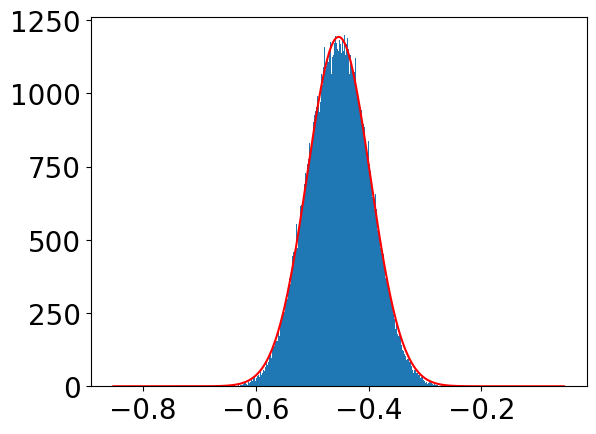

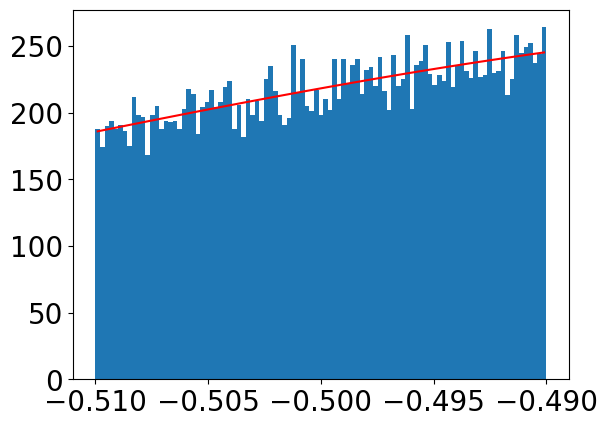

In [54]:
fig, ax = plt.subplots()
# time_col = 'tnaive20'
time_col = 'tfit20'
pool1, pool2 = 3, 4
df_filter = df[(df[f'peakparam_C1/peakparam_C1.charge_{pool1}'] > 0.2) & (df[f'peakparam_C1/peakparam_C1.charge_{pool2}'] > 0.2)]
c1_diff = df_filter[f'peakparam_C1/peakparam_C1.{time_col}_{pool1}'] - df_filter[f'peakparam_C1/peakparam_C1.{time_col}_{pool2}']
binning = np.linspace(np.nanmean(c1_diff) - 0.4, np.nanmean(c1_diff) + 0.4, 1000)
hist, bin_edges, _ = ax.hist(c1_diff, bins=binning)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt, pcov = cf(gaus, bin_centers, hist, p0=[np.max(hist), np.nanmean(c1_diff), np.nanstd(c1_diff)])
ax.plot(bin_centers, gaus(bin_centers, *popt), c='r')
print(abs(popt[2]) * 1000)

fig, ax = plt.subplots()
binning = np.linspace(-0.51, -0.49, 100)
hist, bin_edges, _ = ax.hist(c1_diff, bins=binning)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt, pcov = cf(gaus, bin_centers, hist, p0=[np.max(hist), np.nanmean(c1_diff), np.nanstd(c1_diff)])
ax.plot(bin_centers, gaus(bin_centers, *popt), c='r')
print(abs(popt[2]) * 1000)

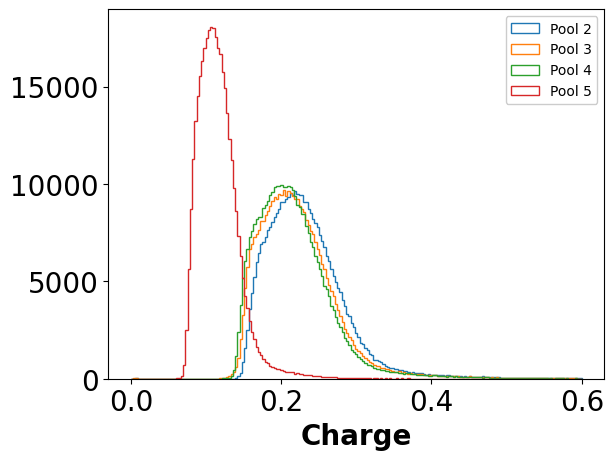

In [53]:
binning = np.linspace(0, 0.6, 200)
fig, ax = plt.subplots()
for pool_num in pool_numbers:
    ax.hist(df[f'peakparam_C1/peakparam_C1.charge_{pool_num}'], bins=binning, histtype='step', label=f'Pool {pool_num}')
ax.set_xlabel('Charge')
ax.legend()

In [ ]:
event_start_number = get_run_event_start(df)
print(event_start_number)
# event_start, event_end = 4416, None
event_start, event_end = event_start_number, None

if event_start is not None:
    df = df[df['eventNo'] >= event_start]
if event_end is not None:
    df = df[df['eventNo'] <= event_end]

In [ ]:
# Loop over channels
mcp_bins = np.arange(0, 1.0, 0.01)
ebins = np.arange(0, 10, 0.2)
totbins = np.arange(0, 100, 2)

for channel in [mcp_channel, mm_channel]:
    if channel == mcp_channel:
        charge_types = ["charge"]
    else:
        charge_types = ["echargefit", "echarge", "echargefixed", "totchargefixed", "totcharge"]

    num_charges = len(charge_types)

    fig, axes = plt.subplots(1, num_charges, figsize=(12,6), sharey=True)

    # Ensure axes is always iterable (wrap in list if only one subplot)
    if num_charges == 1:
        axes = [axes]

    # fig.suptitle(f"Histograms of Charges for {channel}", fontsize=14)

    for i, charge_type in enumerate(charge_types):
        key = f'peakparam_{channel}/peakparam_{channel}.{charge_type}'
        charge_data = df[key]

        if "totcharge" in charge_type:
            filtered_data = charge_data[(charge_data > min_charge_tot) & (charge_data < max_charge_tot)]
            binning = totbins
        elif "echarge" in charge_type:
            filtered_data = charge_data[(charge_data > min_echarge) & (charge_data < max_echarge)]
            binning = ebins
        else:
            filtered_data = charge_data[(charge_data > min_charge) & (charge_data < max_charge)]
            binning = ebins
            if channel == mcp_channel:
                binning = mcp_bins

        n_overflows = np.sum(charge_data > binning[-1])
        axes[i].hist(filtered_data, bins=binning, alpha=0.7, color='blue', edgecolor='black', zorder=2)
        axes[i].set_title(charge_type)
        axes[i].set_xlabel('Charge [pC]')
        axes[i].grid(True, zorder=0)
        # Add overflow text
        axes[i].text(
            0.95, 0.9,  # Position (relative to axes, 95% right, 90% up)
            f'Overflows: {n_overflows}',
            transform=axes[i].transAxes,  # Use axes coordinates (0,0 is bottom-left, 1,1 is top-right)
            fontsize=12, color='red', ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Add a background box
        )
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
plt.savefig(f'charge_histograms_{channel}.pdf', dpi=300)
plt.savefig(f'charge_histograms_{channel}.png', dpi=300)

In [ ]:
channel_charge_types = {
    mcp_channel: ["charge"],
    mm_channel: ["echargefit", "echarge", "echargefixed", "totchargefixed", "totcharge"],
}

# Loop through the channels you want to plot
for channel in channels:
    charge_types = channel_charge_types[channel]  # Select charge types based on the channel

    fig, axs = plt.subplots(ncols=2, figsize=(8, 4))  # Create figure with 2 subplots (ncols=2)

    # Loop over each charge type for the current channel
    for charge_type in charge_types:
        key = f'peakparam_{channel}/peakparam_{channel}.{charge_type}'
        charge_data = df[key]

        # Apply filters based on the charge type (e.g., total charge vs. echarge)
        if "totcharge" in charge_type:
            filtered_data = charge_data[(charge_data > min_charge_tot) & (charge_data < max_charge_tot)]
            binning = totbins
            ax_num = 0  # First subplot (totcharge)
        elif "echarge" in charge_type:
            filtered_data = charge_data[(charge_data > min_echarge) & (charge_data < max_echarge)]
            binning = ebins
            ax_num = 1
        else:
            filtered_data = charge_data[(charge_data > min_charge) & (charge_data < max_charge)]
            binning = ebins
            ax_num = 1  # Second subplot (echarge)
            if channel == mcp_channel:
                binning = mcp_bins  # Special binning for mcp

        # Plot the histogram
        n, bins, _ = axs[ax_num].hist(filtered_data, bins=binning, alpha=0.7, label=charge_type,
                                      zorder=2, histtype='step', linewidth=3)

        # Optional: Adding labels on top of histogram lines (bins)
        for i in range(len(bins)-1):
            # Find the position to put the label (at the middle of each bin)
            bin_center = (bins[i] + bins[i+1]) / 2
            count = n[i]  # Get the count (height) of the histogram at this bin
            # axs[ax_num].text(bin_center, count, f'{int(count)}', ha='center', va='bottom', fontsize=8)

    # Customize the plots
    axs[0].set_xlabel('Charge [pC]')
    axs[0].grid(True)
    axs[1].set_xlabel('Charge [pC]')
    axs[1].grid(True)

    # Add legends to the subplots
    axs[0].legend(title="Charge Types")
    axs[1].legend(title="Charge Types")

    # Set title for the current channel
    # fig.suptitle(f"Histograms of Charges for {channel}", fontsize=14)

    # Adjust the layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Show plot for the current channel
    plt.show()

In [ ]:
time_col = 'tfit20_nb'
df[f'{mm_channel}_time_diff'] = df[f'peakparam_{mm_channel}/peakparam_{mm_channel}.{time_col}'] - df[f'peakparam_{mcp_channel}/peakparam_{mcp_channel}.{time_col}']

filters = {channel: {} for channel in channels}
for channel in channels:
    
    tot_charge_data = df[f'peakparam_{channel}/peakparam_{channel}.totcharge']
    filters[channel].update({'totcharge_cut': (tot_charge_data > min_charge_tot) & (tot_charge_data < max_charge_tot)})

    echarge_data = df[f'peakparam_{channel}/peakparam_{channel}.echarge']
    filters[channel].update({'echarge_cut': (echarge_data > min_echarge) & (echarge_data < max_echarge)})

    echarge_fit_data = df[f'peakparam_{channel}/peakparam_{channel}.echargefit']
    filters[channel].update({'echargefit_cut': (echarge_fit_data > min_echarge) & (echarge_fit_data < max_echarge)})

    charge_data = df[f'peakparam_{channel}/peakparam_{channel}.charge']
    filters[channel].update({'charge_cut': (charge_data > min_charge_tot) & (charge_data < max_charge_tot)})

    ampl_data = df[f'peakparam_{channel}/peakparam_{channel}.ampl']
    filters[channel].update({'ampl_cut': (ampl_data > min_ampl) & (ampl_data < max_ampl)})

    dampl_data = df[f'peakparam_{channel}/peakparam_{channel}.dampl']
    filters[channel].update({'dampl_cut': (dampl_data > min_ampl) & (dampl_data < max_ampl)})
    # filters[channel].update({'saturation_cut': dampl_data < mm_saturation_voltage})
    mm_saturation_voltage = np.max(dampl_data) - mm_saturation_voltage_buffer
    filters[channel].update({'saturation_cut': dampl_data < mm_saturation_voltage})


    #
    # echarge_fit_data = df[f'peakparam_{channel}/peakparam_{channel}.echargefit']
    # filters[channel].update({'echargefit_cut': (echarge_fit_data > min_charge) & (echarge_fit_data < max_charge)})

    x_data = df[f'hitX_{channel}']
    y_data = df[f'hitY_{channel}']
    
    xy_filter_cut = (x_data > xy_range_min) & (x_data < xy_range_max) & (y_data > xy_range_min) & (y_data < xy_range_max)
    filters[channel].update({'xy_cut': xy_filter_cut})
    
time_diff_data = df[f'{mm_channel}_time_diff']
filters[mm_channel].update({'time_diff_na_cut': ~pd.isna(time_diff_data)})
time_diff_median = np.nanmedian(time_diff_data)
filters[mm_channel].update({'time_diff_range_cut': (time_diff_data > time_diff_median + sat_range[0]) & (time_diff_data < time_diff_median + sat_range[1])})
print(f'Time diff median={time_diff_median}, cuts=[{time_diff_median + sat_range[0]}, {time_diff_median + sat_range[1]}]')

# Get filtered dataframes for each channel -- charge filter
mcp_charge_filtered_df = df[filters[mcp_channel]['charge_cut']]
mm_charge_filtered_df = df[filters[mm_channel]['totcharge_cut']]

x_mcp_filtered = mcp_charge_filtered_df[f'hitX_{mcp_channel}']
y_mcp_filtered = mcp_charge_filtered_df[f'hitY_{mcp_channel}']

In [ ]:
fig, axes = plt.subplots(nrows=len(channels), ncols=1, figsize=(8, 10))  # 3 rows, 1 column

for i, channel in enumerate(channels):
    # Get first charge or total charge based on the channel
    if channel == mcp_channel:
        first_charges_unfiltered = df[f'peakparam_{channel}/peakparam_{channel}.charge']
        df_filter = df[filters[channel]['charge_cut']]
        first_charges_filtered = df_filter[f'peakparam_{channel}/peakparam_{channel}.charge']
    else:
        first_charges_unfiltered = df[f'peakparam_{channel}/peakparam_{channel}.totcharge']
        df_filter = df[filters[channel]['totcharge_cut']]
        first_charges_filtered = df_filter[f'peakparam_{channel}/peakparam_{channel}.totcharge']

    # Convert to numpy arrays for filtering
    n_overflows = np.sum(first_charges_unfiltered < min_charge_tot) + np.sum(first_charges_unfiltered > max_charge_tot)  # Overflow count
    n_in_range = len(first_charges_filtered)
    n_total = n_in_range + n_overflows

    # Print outliers information
    print(f'{channel} Number of outliers: {n_overflows} of {n_total}')
    print(f'{channel} Number after filter: {len(first_charges_filtered)} of {n_total}')
    print(f'{channel} channel: min = {np.nanmin(first_charges_filtered)}, max = {np.nanmax(first_charges_filtered)}')

    # Plot each channel's charge histogram
    ax = axes[i]  # Use the appropriate axis in the grid
    ax.hist(first_charges_filtered, bins=100, alpha=0.7, color='blue', edgecolor='black', zorder=2)

    # Set title based on the channel
    if channel == mcp_channel:
        ax.set_title(f'Charge of first peak in {channel} channel')
    else:
        ax.set_title(f'Tot charge of first peak in {channel} channel')

    # Set labels
    ax.set_xlabel('Total Charge [pC]')
    ax.set_ylabel('Counts')

    # Add overflow text
    ax.text(
        0.95, 0.9,  # Position (relative to axes, 95% right, 90% up)
        f'Overflows: {n_overflows}',
        transform=ax.transAxes,  # Use axes coordinates (0,0 is bottom-left, 1,1 is top-right)
        fontsize=12, color='red', ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Background box
    )

    ax.grid(True, zorder=0)

# Adjust layout to avoid overlap and ensure titles fit
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap

In [ ]:
fig, axes = plt.subplots(nrows=len(channels), ncols=2, figsize=(12, 10))  # 3 rows, 2 columns

for i, channel in enumerate(channels):
    # First peak amplitude histogram
    first_ampls_unfiltered = df[f'peakparam_{channel}/peakparam_{channel}.ampl']
    df_filter = df[filters[channel]['ampl_cut']]
    first_ampls_filtered = df_filter[f'peakparam_{channel}/peakparam_{channel}.ampl']

    n_overflows = np.sum(first_ampls_unfiltered < min_ampl) + np.sum(first_ampls_unfiltered > max_ampl)  # Overflow count
    n_in_range = len(first_ampls_filtered)
    n_total = n_in_range + n_overflows

    # Plot first_ampls_filtered histogram
    ax = axes[i, 0]  # Left column
    ax.hist(first_ampls_filtered, bins=100, alpha=0.7, color='blue', edgecolor='black', zorder=2)
    ax.set_title(f'{channel} - Amplitude')
    ax.set_xlabel('Amplitude [V]')
    ax.set_ylabel('Counts')
    ax.grid(True, zorder=0)

    # Add overflow text for first_ampls
    ax.text(
        0.95, 0.9,  # Position (relative to axes, 95% right, 90% up)
        f'Overflows: {n_overflows}',
        transform=ax.transAxes,  # Use axes coordinates (0,0 is bottom-left, 1,1 is top-right)
        fontsize=12, color='red', ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Background box
    )

    # For C2, add the second amplitude (dampl) plot
    if channel == mm_channel:
        first_dampls_unfiltered = df[f'peakparam_{channel}/peakparam_{channel}.dampl']
        df_filter = df[filters[channel]['dampl_cut']]
        first_dampls_filtered = df_filter[f'peakparam_{channel}/peakparam_{channel}.dampl']

        n_overflows = np.sum(first_dampls_unfiltered < min_ampl) + np.sum(first_dampls_unfiltered > max_ampl)  # Overflow count
        n_in_range = len(first_dampls_filtered)
        n_total = n_in_range + n_overflows

        # Plot first_dampls_filtered histogram
        ax = axes[i, 1]  # Right column
        ax.hist(first_dampls_filtered, bins=100, alpha=0.7, color='blue', edgecolor='black', zorder=2)
        ax.set_title(f'{channel} - Amplitude Fit')
        ax.set_xlabel('Amplitude [V]')
        ax.set_ylabel('Counts')
        ax.grid(True, zorder=0)

        # Add overflow text for first_dampls
        ax.text(
            0.95, 0.9,  # Position (relative to axes, 95% right, 90% up)
            f'Overflows: {n_overflows}',
            transform=ax.transAxes,  # Use axes coordinates (0,0 is bottom-left, 1,1 is top-right)
            fontsize=12, color='red', ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Background box
        )

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap
plt.savefig('amplitude_histograms.pdf', dpi=300)

In [ ]:
channels = filters.keys()  # Get all available channels
num_channels = len(channels)

fig, axes = plt.subplots(nrows=1, ncols=num_channels, figsize=(5*num_channels, 5))

if num_channels == 1:
    axes = [axes]  # Ensure `axes` is iterable when there's only one subplot

for ax, ch in zip(axes, channels):
    df_filter = df[filters[ch]['ampl_cut']]
    ampl_filtered = df_filter[f'peakparam_{ch}/peakparam_{ch}.ampl']
    dampl_filtered = df_filter[f'peakparam_{ch}/peakparam_{ch}.dampl']

    ax.scatter(ampl_filtered, dampl_filtered, s=1)
    ax.set_title(f'Channel {ch}')
    ax.set_xlabel('Amplitude-Fit [V]')
    ax.set_ylabel('Amplitude-Data [V]')
# fig.text(0.5, 0.02, 'Amplitude-Fit [V]', ha='center', fontsize=12)
plt.tight_layout()

In [ ]:
compare_ch_ampl = [ch for ch in filters.keys() if ch != mcp_channel]

num_plots = len(compare_ch_ampl)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(6*num_plots, 5), sharex=True, sharey=True)

if num_plots == 1:
    axes = [axes]  # Ensure `axes` is iterable when there's only one subplot

# Filter MCP data once (to avoid redundant computation)
df_filter_mcp = df[filters[mcp_channel]['ampl_cut']]
mcp_ampl_filtered = df_filter_mcp[f'peakparam_{mcp_channel}/peakparam_{mcp_channel}.ampl']

for ax, ch in zip(axes, compare_ch_ampl):
    # Apply filter for the other channel
    df_filter_ch = df[filters[ch]['ampl_cut']]
    ch_ampl_filtered = df_filter_ch[f'peakparam_{ch}/peakparam_{ch}.ampl']

    # Plot histograms
    ax.hist(mcp_ampl_filtered, bins=100, histtype='step', color='black', lw=2, label='C1-MCP')
    ax.hist(ch_ampl_filtered, bins=100, histtype='step', color='red', lw=2, label=f'{ch} - MM-Pad')

    # Set title and legend
    ax.set_title(f'C1 vs {ch}')
    ax.set_xlabel('Amplitude-Fit [V]')
    ax.legend()

plt.tight_layout()

In [ ]:
# Get all channels except C1
compare_ch_charge = [ch for ch in filters.keys() if ch != mcp_channel]

num_plots = len(compare_ch_charge)
print(num_plots)
fig, axes = plt.subplots(nrows=2, ncols=num_plots, figsize=(6*num_plots, 10), sharex=True, sharey=False)
print(axes.shape)

if num_plots == 1:
    axes = [axes]# Ensure `axes` is iterable when there's only one subplot
    print(axes)
# Filter C1 data once (to avoid redundant computation)
df_filter_mcp = df[filters[mcp_channel]['charge_cut']]
mcp_ch_filtered = df_filter_mcp[f'peakparam_{mcp_channel}/peakparam_{mcp_channel}.charge']

for col, ch in enumerate(compare_ch_charge):
    # Apply filter for the other channel
    df_filter_ch = df[filters[ch]['echargefit_cut']]
    ch_ech_filtered = df_filter_ch[f'peakparam_{ch}/peakparam_{ch}.echargefit']

    # Linear scale histogram (first row)
    axes[col][0].hist(mcp_ch_filtered, bins=100, histtype='step', color='black', lw=2, label='C1-MCP')
    axes[col][0].hist(ch_ech_filtered, bins=100, histtype='step', color='red', lw=2, label=f'{ch}-MM-Pad')
    axes[col][0].set_title(f'C1 vs {ch}')
    axes[col][0].set_xlabel('e-peak Charge [pC]')
    axes[col][0].legend()

    # Log scale histogram (second row)
    axes[col][1].hist(mcp_ch_filtered, bins=100, histtype='step', color='black', lw=2, label='C1-MCP')
    axes[col][1].hist(ch_ech_filtered, bins=100, histtype='step', color='red', lw=2, label=f'{ch}-MM-Pad')
    axes[col][1].set_yscale('log')  # Set log scale for y-axis
    axes[col][1].set_xlabel('e-peak Charge [pC]')
    axes[col][1].legend()

plt.tight_layout()

In [ ]:
# Get all channels except C1
compare_ch_totcharge = [ch for ch in filters.keys() if ch != mcp_channel]

num_plots = len(compare_ch_totcharge)
fig, axes = plt.subplots(nrows=2, ncols=num_plots, figsize=(6*num_plots, 10), sharex=True, sharey=False)

if num_plots == 1:
    axes = [axes]  # Ensure `axes` is iterable when there's only one subplot

# Filter C1 data once (to avoid redundant computation)
df_filter_mcp = df[filters[mcp_channel]['charge_cut']]
mcp_ch_filtered = df_filter_mcp[f'peakparam_{mcp_channel}/peakparam_{mcp_channel}.charge']

for col, ch in enumerate(compare_ch_totcharge):
    # Apply filter for the other channel
    df_filter_ch = df[filters[ch]['totcharge_cut']]
    ch_ech_filtered = df_filter_ch[f'peakparam_{ch}/peakparam_{ch}.totcharge']

    # Linear scale histogram (first row)
    axes[col][0].hist(mcp_ch_filtered, bins=100, histtype='step', color='black', lw=2, label='C1-MCP')
    axes[col][0].hist(ch_ech_filtered, bins=100, histtype='step', color='red', lw=2, label=f'{ch}-MM-Pad')
    axes[col][0].set_title(f'C1 vs {ch}')
    axes[col][0].set_xlabel('Total Charge [pC]')
    axes[col][0].legend()

    # Log scale histogram (second row)
    axes[col][1].hist(mcp_ch_filtered, bins=100, histtype='step', color='black', lw=2, label='C1-MCP')
    axes[col][1].hist(ch_ech_filtered, bins=100, histtype='step', color='red', lw=2, label=f'{ch}-MM-Pad')
    axes[col][1].set_yscale('log')  # Set log scale for y-axis
    axes[col][1].set_xlabel('Total Charge [pC]')
    axes[col][1].legend()

plt.tight_layout()

In [ ]:
channels = filters.keys()  # Get all available channels
num_channels = len(channels)

fig, axes = plt.subplots(nrows=1, ncols=num_channels, figsize=(5*num_channels, 5))

if num_channels == 1:
    axes = [axes]  # Ensure `axes` is iterable when there's only one subplot

for ax, ch in zip(axes, channels):
    df_filter = df[filters[ch]['ampl_cut']]
    ampl_filtered = df_filter[f'peakparam_{ch}/peakparam_{ch}.ampl']
    dampl_filtered = df_filter[f'peakparam_{ch}/peakparam_{ch}.dampl']


    df_filter_saturation = df[filters[ch]['ampl_cut'] & ~filters[ch]['saturation_cut']]
    ampl_saturation = df_filter_saturation[f'peakparam_{ch}/peakparam_{ch}.ampl']
    dampl_saturation = df_filter_saturation[f'peakparam_{ch}/peakparam_{ch}.dampl']



    ax.scatter(ampl_filtered, dampl_filtered, s=1)

    if ch != mcp_channel:
        ax.scatter(ampl_saturation, dampl_saturation, s=2, color='red', label=f'Saturation {mm_channel}')
        ax.axhline(mm_saturation_voltage, color='green', linestyle='-', label='Saturation Voltage')

    ax.set_title(f'Channel {ch}')
    ax.set_xlabel('Amplitude-Fit [V]')
    ax.set_ylabel('Amplitude-Data [V]')
# fig.text(0.5, 0.02, 'Amplitude-Fit [V]', ha='center', fontsize=12)
plt.tight_layout()

In [ ]:
channels = [ch for ch in filters.keys() if ch != mcp_channel]
num_channels = len(channels)
print(num_channels)

fig, axs = plt.subplots(nrows=num_channels, ncols=3, figsize=(18, 6*num_channels), sharex=False, sharey=False)

if num_channels == 1:
    axs = [axs]  # Ensure axs is iterable when there's only one channel

# Loop over each channel
for row, ch in enumerate(channels):
    df_filter = df[filters[ch]['ampl_cut']]

    # Extract data
    x_filtered = df_filter[f'peakparam_{ch}/peakparam_{ch}.ampl']
    y_filtered = df_filter[f'peakparam_{ch}/peakparam_{ch}.echargefit']

    df_saturation = df[filters[ch]['ampl_cut'] & ~filters[ch]['saturation_cut']]
    x_saturation = df_saturation[f'peakparam_{ch}/peakparam_{ch}.ampl']
    y_saturation = df_saturation[f'peakparam_{ch}/peakparam_{ch}.echargefit']

    # First scatter plot (Amplitude vs e-peak Charge with rejection line)
    up_slope, up_offset = 50, 0.5
    up_rejects_filter = y_filtered > line(x_filtered, up_slope, up_offset)
    up_rejects_x = x_filtered[up_rejects_filter]
    up_rejects_y = y_filtered[up_rejects_filter]

    axs[row][0].scatter(x_filtered, y_filtered, s=0.6, color='black', label=f'{ch} - MM Pad')
    axs[row][0].scatter(up_rejects_x, up_rejects_y, s=2, color='blue', label='Rejects')
    axs[row][0].scatter(x_saturation, y_saturation, s=2, color='red', label=f'Saturation {mm_channel}')
    axs[row][0].plot(np.array(x_filtered), line(np.array(x_filtered), up_slope, up_offset), color='red', label='y=x')

    axs[row][0].set_xlabel('Amplitude [V]')
    axs[row][0].set_ylabel('e-peak Charge [pC]')
    axs[row][0].set_xlim(0, 0.45)
    axs[row][0].set_ylim(0, 40)
    axs[row][0].legend()
    axs[row][0].set_title(f'{ch} - Amplitude vs e-peak Charge')

    # Second scatter plot (Amplitude vs Total Charge)
    axs[row][1].scatter(x_filtered, y_filtered, s=0.6, color='black', label=f'{ch} - MM Pad')
    axs[row][1].scatter(x_saturation, y_saturation, s=2, alpha=0.2, color='red', label=f'Saturation {mm_channel}')

    axs[row][1].set_xlabel('Amplitude [V]')
    axs[row][1].set_ylabel('Total Charge [pC]')
    axs[row][1].set_xlim(0, 0.9)
    axs[row][1].set_ylim(0, 500)
    axs[row][1].legend()
    axs[row][1].set_title(f'{ch} - Amplitude vs Total Charge')

    # Third scatter plot (e-peak Charge vs Total Charge)
    x_filtered_2 = df_filter[f'peakparam_{ch}/peakparam_{ch}.echargefit']
    y_filtered_2 = df_filter[f'peakparam_{ch}/peakparam_{ch}.totcharge']

    x_saturation_2 = df_saturation[f'peakparam_{ch}/peakparam_{ch}.echargefit']
    y_saturation_2 = df_saturation[f'peakparam_{ch}/peakparam_{ch}.totcharge']


    axs[row][2].scatter(x_filtered_2, y_filtered_2, s=0.6, color='black', label=f'{ch} - MM Pad')
    axs[row][2].scatter(x_saturation_2, y_saturation_2, s=2, alpha=0.2, color='red', label=f'Saturation {mm_channel}')
    axs[row][2].set_xlabel('e-peak Charge [pC]')
    axs[row][2].set_ylabel('Total Charge [pC]')
    axs[row][2].set_xlim(0, 80)
    axs[row][2].set_ylim(0, 500)
    axs[row][2].legend()
    axs[row][2].set_title(f'{ch} - e-peak Charge vs Total Charge')

plt.tight_layout()
plt.show()

# Get the pad center using the charge weighted method

In [ ]:
channel = mcp_channel
df_filter = df[filters[channel]['charge_cut'] & filters[channel]['xy_cut']]
xs_mcp_filtered = df_filter[f'hitX_{channel}']
ys_mcp_filtered = df_filter[f'hitY_{channel}']
charges_mcp_filtered = df_filter[f'peakparam_{channel}/peakparam_{channel}.charge']
get_pad_center(charges_mcp_filtered, xs_mcp_filtered, ys_mcp_filtered, min_tracks_per_2d_bin=0, min_avg_charge_per_2d_bin=0, plot=True, plot_only=True)

In [ ]:
mcp_pad_center_measures = get_pad_center(charges_mcp_filtered, xs_mcp_filtered, ys_mcp_filtered, min_tracks_per_2d_bin=mcp_min_tracks_per_2d_bin, min_avg_charge_per_2d_bin=mcp_min_avg_charge_per_2d_bin, plot=True, plot_only=False)
print(f'C1 Pad Center: ({", ".join([str(xi) for xi in mcp_pad_center_measures])})')

In [ ]:
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['saturation_cut']]
xs_mm_filtered = df_filter[f'hitX_{mm_channel}']
ys_mm_filtered = df_filter[f'hitY_{mm_channel}']
charges_mm_filtered = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
get_pad_center(charges_mm_filtered, xs_mm_filtered, ys_mm_filtered, min_tracks_per_2d_bin=0, min_avg_charge_per_2d_bin=0, plot=True, plot_only=True)


In [ ]:
mm_pad_center_measures = get_pad_center(charges_mm_filtered, xs_mm_filtered, ys_mm_filtered, min_avg_charge_per_2d_bin=mm_min_avg_charge_per_2d_bin, min_tracks_per_2d_bin=mm_min_tracks_per_2d_bin, plot=True)
print(f'{mm_channel} Pad Center: ({", ".join([str(xi) for xi in mm_pad_center_measures])})')

df[f'hitR_{mm_channel}'] = np.sqrt((df[f'hitX_{mm_channel}'] - mm_pad_center_measures[0].val) ** 2 + (df[f'hitY_{mm_channel}'] - mm_pad_center_measures[1].val) ** 2)
r_inner = 4.3
r_outer = hex_radius_inner_to_outer(r_inner)
filters[mm_channel].update({'r_cut': df[f'hitR_{mm_channel}'] < r_outer})

# Get the time walk parameterization raw data

In [ ]:
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut']]
charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
time_diff = df_filter[f'{mm_channel}_time_diff']

indiv_params, med_bins_params, gaus_bins_params = get_time_walk(time_diff, charges, time_walk_func, p0_time_walk, percentile_cut=(2, 98), plot=True, plot_indiv_fits=False)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
binning_t20_diff = np.linspace(np.min(time_diff), np.max(time_diff), 100)
ax.hist(time_diff, bins=binning_t20_diff, histtype='step', color='black')
#make y-axis log scale
ax.set_yscale('log')
ax.set_xlabel('SAT Raw [ns]')

# Create an inset axis
ax_inset = inset_axes(ax, width="50%", height="70%", loc="upper right")  # % of parent axis

# Inset plot data
binning_t20_diff_nom = np.arange(0, 12, 0.2)
ax_inset.set_yscale('log')
ax_inset.hist(time_diff, bins=binning_t20_diff_nom, histtype='step', color='black')

In [ ]:
# plot SAT vs charge for different r on the same plot
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['saturation_cut'] & filters[mm_channel]['time_diff_na_cut']]
charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
time_diff = df_filter[f'{mm_channel}_time_diff']
rs = df_filter[f'hitR_{mm_channel}']

get_time_walk_r_separated(time_diff, charges, rs, percentile_cut=(2,98), binning_type='equal_stats', n_bins=20, ylim=(-0.7,-0.6))
get_time_walk_r_separated(time_diff, charges, rs, percentile_cut=(2,98), binning_type='equal_stats', n_bins=20, ylim=(6.23, 6.28))

# Time walk parameterization with radial cut

In [ ]:
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['r_cut'] & filters[mm_channel]['saturation_cut'] & filters[mm_channel]['time_diff_na_cut']]
charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
time_diff = df_filter[f'{mm_channel}_time_diff']
xs = df_filter[f'hitX_{mm_channel}']
ys = df_filter[f'hitY_{mm_channel}']
rs = df_filter[f'hitR_{mm_channel}']

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
binning_t20_diff = np.linspace(np.min(time_diff), np.max(time_diff), 100)
ax.hist(time_diff, bins=binning_t20_diff, histtype='step', color='black')
#make y-axis log scale
ax.set_yscale('log')
ax.set_xlabel('SAT Raw [ns]')

# Create an inset axis
ax_inset = inset_axes(ax, width="50%", height="70%", loc="upper left")  # % of parent axis

# Inset plot data
binning_t20_diff_nom = np.arange(-3, 12, 0.2)
# ax_inset.axvline(2.5, color='red', ls='-')
# ax_inset.axvline(4.3, color='red', ls='-')
ax_inset.set_yscale('log')
ax_inset.hist(time_diff, bins=binning_t20_diff_nom, histtype='step', color='black')

# Check outliers in the time difference with their track position

In [ ]:
# time_diff_mask = (time_diff < 2.5) | ( time_diff > 4.3)
time_diff_mask = (time_diff < 5) | ( time_diff > 7)
# print(time_diff_mask)
# small_time_diff_mask = time_diff_filter < 2.5
# local_time_diff_mask = np.abs(time_diff_filter) > 4.3 or 7.5

xs_large_time_diff = xs[time_diff_mask]
ys_large_time_diff = ys[time_diff_mask]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xs_large_time_diff, ys_large_time_diff, alpha=0.5, label='Outliers')
ax.scatter(mm_pad_center_measures[0].val, mm_pad_center_measures[1].val,
           color='red', marker='x', s=100, label='Pad Center')

center_x, center_y = mm_pad_center_measures[0].val, mm_pad_center_measures[1].val
inner_circle = patches.Circle((center_x, center_y), r_inner, fill=False, edgecolor='blue', linestyle='dashed', label='Inner Circle')
outer_circle = patches.Circle((center_x, center_y), r_outer, fill=False, edgecolor='green', linestyle='solid', label='Outer Circle')

ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

ax.set_xlim(center_x - r_outer - 1, center_x + r_outer + 1)
ax.set_ylim(center_y - r_outer - 1, center_y + r_outer + 1)

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [ ]:
if double_peak_t_regions is not None:
    top_peak_mask = (time_diff < double_peak_t_regions[1][1]) & (time_diff > double_peak_t_regions[1][0]) & (charges > 20)
    bot_peak_mask = (time_diff < double_peak_t_regions[0][1]) & (time_diff > double_peak_t_regions[0][0]) & (charges > 20)

    xs_large_time_diff_top = xs[top_peak_mask]
    ys_large_time_diff_top = ys[top_peak_mask]
    xs_large_time_diff_bot = xs[bot_peak_mask]
    ys_large_time_diff_bot = ys[bot_peak_mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(xs_large_time_diff_top, ys_large_time_diff_top, alpha=0.2, label='Outliers Top', color='blue', s=1)
    ax.scatter(xs_large_time_diff_bot, ys_large_time_diff_bot, alpha=0.2, label='Outliers Bot', color='red', s=1)
    ax.scatter(mm_pad_center_measures[0].val, mm_pad_center_measures[1].val,
               color='red', marker='x', s=100, label='Pad Center')

    center_x, center_y = mm_pad_center_measures[0].val, mm_pad_center_measures[1].val
    inner_circle = patches.Circle((center_x, center_y), r_inner, fill=False, edgecolor='blue', linestyle='dashed', label='Inner Circle')
    outer_circle = patches.Circle((center_x, center_y), r_outer, fill=False, edgecolor='green', linestyle='solid', label='Outer Circle')

    ax.add_patch(inner_circle)
    ax.add_patch(outer_circle)

    ax.set_xlim(center_x - r_outer - 1, center_x + r_outer + 1)
    ax.set_ylim(center_y - r_outer - 1, center_y + r_outer + 1)

    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

    srs_no_top = df_filter['SRSNo'][top_peak_mask]
    srs_no_bot = df_filter['SRSNo'][bot_peak_mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    binning = np.linspace(np.min(df_filter['SRSNo']), np.max(df_filter['SRSNo']), 1000)
    ax.hist(srs_no_top, bins=binning, color='blue')
    ax.hist(srs_no_bot, bins=binning, color='green')
    ax.set_xlim(90000, 150000)
    ax.set_xlabel('SRS Number')

    epeak_charge = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.echargefit']
    ampl = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.ampl']

    # Plot epeak vs ampl scatterplot for two different masks
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(epeak_charge[top_peak_mask], ampl[top_peak_mask], label='Top Peak', alpha=0.7, color='blue')
    ax.scatter(epeak_charge[bot_peak_mask], ampl[bot_peak_mask], label='Bottom Peak', alpha=0.7, color='green')
    ax.set_xlabel('ePeak Charge Fit')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'ePeak vs Amplitude for {mm_channel}')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(epeak_charge[top_peak_mask], time_diff[top_peak_mask], label='Top Peak', alpha=0.7, color='blue')
    ax.scatter(epeak_charge[bot_peak_mask], time_diff[bot_peak_mask], label='Bottom Peak', alpha=0.7, color='green')
    ax.set_xlabel('ePeak Charge Fit')
    ax.set_ylabel('Time Difference')
    ax.set_title(f'ePeak vs Time Difference for {mm_channel}')

    chi2_sigmoid = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.echargefit']
    fig, ax = plt.subplots(figsize=(8, 6))
    binning = np.linspace(np.min(chi2_sigmoid), np.max(chi2_sigmoid), 100)
    ax.hist(chi2_sigmoid[top_peak_mask], bins=binning, histtype='step', color='blue')
    ax.hist(chi2_sigmoid[bot_peak_mask], bins=binning, histtype='step', color='green')
    ax.set_xlabel('chi2 sigmoid')

    npeaks = df_filter[f'npeaks_{mm_channel}']
    fig, ax = plt.subplots(figsize=(8, 6))
    binning = np.linspace(np.min(npeaks), np.max(npeaks), 100)
    ax.hist(npeaks[top_peak_mask], bins=binning, histtype='step', color='blue')
    ax.hist(npeaks[bot_peak_mask], bins=binning, histtype='step', color='green')
    ax.set_yscale('log')
    ax.set_xlabel('n_peaks')

    mcp_rise_time = df_filter[f'peakparam_{mcp_channel}/peakparam_{mcp_channel}.risetime']
    mm_rise_time = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.risetime']

    fig, ax = plt.subplots(figsize=(8, 6))
    binning = np.linspace(np.min(mcp_rise_time), np.max(mcp_rise_time), 100)
    ax.hist(mcp_rise_time[top_peak_mask], bins=binning, histtype='step', color='blue')
    ax.hist(mcp_rise_time[bot_peak_mask], bins=binning, histtype='step', color='green')
    ax.set_xlabel('MCP Rise Time')

    fig, ax = plt.subplots(figsize=(8, 6))
    binning = np.linspace(np.min(mm_rise_time), np.max(mm_rise_time), 100)
    ax.hist(mm_rise_time[top_peak_mask], bins=binning, histtype='step', color='blue')
    ax.hist(mm_rise_time[bot_peak_mask], bins=binning, histtype='step', color='green')
    ax.set_xlabel('MM Rise Time')
    print(f'MM min rise time: {np.min(mm_rise_time)}, MM max rise time: {np.max(mm_rise_time)}')

    mcp_timing = df_filter[f'peakparam_{mcp_channel}/peakparam_{mcp_channel}.tfit20']
    fig, ax = plt.subplots(figsize=(8, 6))
    binning = np.linspace(np.min(mcp_timing), np.max(mcp_timing), 100)
    ax.hist(mcp_timing[top_peak_mask], bins=binning, histtype='step', color='blue')
    ax.hist(mcp_timing[bot_peak_mask], bins=binning, histtype='step', color='green')
    ax.set_xlabel('MCP SAT')

In [ ]:
if double_peak_t_regions is not None:
    raw_file_dir = '/media/dn277127/EXTERNAL_USB/2312292/Extras/Physics/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/'
    if os.path.isdir(raw_file_dir):
        raw_file_name = find_run_pool_file(raw_file_dir, run_number, pool_number)
        raw_file_path = f'{raw_file_dir}{raw_file_name}'

        event_nums_top = df_filter['eventNo'][top_peak_mask]
        event_nums_bot = df_filter['eventNo'][bot_peak_mask]
        mcp_timing_top = mcp_timing[top_peak_mask]
        mcp_timing_bot = mcp_timing[bot_peak_mask]

        print(f'Events Bottom:\n{event_nums_bot}')
        print(f'Events Top:\n{event_nums_top}')

        fig_all, ax_all = plt.subplots(figsize=(8, 6))
        ax_all.set_xlim(-1, 15)
        # ax_all.set_xlim(4.7, 6)
        # ax_all.set_ylim(-0.3, 0.05)
        event_ishs = np.arange(25)
        for event_ish in event_ishs:
            raw_data_top = get_raw_event_data(raw_file_path, event_nums_top.iloc[event_ish])
            raw_data_bot = get_raw_event_data(raw_file_path, event_nums_bot.iloc[event_ish])
            mcp_arrival_top = mcp_timing_top.iloc[event_ish]
            mcp_arrival_bot = mcp_timing_bot.iloc[event_ish]

            x_top = np.linspace(0, 1000, len(raw_data_top[f'ampl{mm_channel}'])) - mcp_arrival_top
            x_bot = np.linspace(0, 1000, len(raw_data_top[f'ampl{mm_channel}'])) - mcp_arrival_bot

            fig, ax = plt.subplots(figsize=(8, 6))
            ax.plot(x_top, np.array(raw_data_top[f'ampl{mm_channel}']), c='b', label='Top MM')
            ax.plot(x_top, np.array(raw_data_top[f'ampl{mcp_channel}']), c='b', label='Top MCP')
            ax.plot(x_bot, np.array(raw_data_bot[f'ampl{mm_channel}']), c='g', label='Bot')
            ax.plot(x_bot, np.array(raw_data_bot[f'ampl{mcp_channel}']), c='g', label='Bot MCP')
            ax.annotate(
            f'Event Number Top {event_nums_top.iloc[event_ish]}\nEvent Number Bot {event_nums_bot.iloc[event_ish]}',
            xy=(0.8, 0.5),  # middle right in axes coordinates
            xycoords='axes fraction',
            fontsize=10,
            ha='left',
            va='center',
            bbox=dict(boxstyle='round,pad=0.3', fc='lightgray', ec='gray', lw=1)
            )

            ax_all.plot(x_top, np.array(raw_data_top[f'ampl{mm_channel}']) / np.abs(np.min(raw_data_top[f'ampl{mm_channel}'])), c='b', alpha=0.5)
            ax_all.plot(x_top, np.array(raw_data_top[f'ampl{mcp_channel}']) / np.abs(np.min(raw_data_top[f'ampl{mcp_channel}'])), c='b', alpha=0.5)
            ax_all.plot(x_bot, np.array(raw_data_bot[f'ampl{mm_channel}']) / np.abs(np.min(raw_data_bot[f'ampl{mm_channel}'])), c='g', alpha=0.5)
            ax_all.plot(x_bot, np.array(raw_data_bot[f'ampl{mcp_channel}']) / np.abs(np.min(raw_data_bot[f'ampl{mcp_channel}'])), c='g', alpha=0.5)

            ax.legend()

            ax.set_xlim(-1, 15)
    else:
        print(f'Can\'t find {raw_file_dir}')


In [ ]:
# df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['saturation_cut'] & filters[mm_channel]['time_diff_na_cut']]
# charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
# time_diff = df_filter[f'{mm_channel}_time_diff']
# rs = df_filter[f'hitR_{mm_channel}']
#
# get_time_walk(time_diff, charges, time_walk_func, p0_time_walk, n_bins=time_walk_nbins, percentile_cut=(2, 98), plot=True, plot_indiv_fits=False)

In [ ]:
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['r_cut'] & filters[mm_channel]['saturation_cut'] & filters[mm_channel]['time_diff_na_cut'] & filters[mm_channel]['time_diff_range_cut']]
charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
time_diff = df_filter[f'{mm_channel}_time_diff']
xs = df_filter[f'hitX_{mm_channel}']
ys = df_filter[f'hitY_{mm_channel}']
rs = df_filter[f'hitR_{mm_channel}']
# plot SAT vs charge for different r on the same plot
get_time_walk_r_separated(time_diff, charges, rs, percentile_cut=(2,98), binning_type='equal_stats', n_bins=time_walk_nbins, ylim=(6.22, 6.31))


In [ ]:
indiv_params, med_bins_params, gaus_bins_params = get_time_walk(time_diff, charges, time_walk_func, p0_time_walk, percentile_cut=(2, 98), binning_type='equal_stats', n_bins=time_walk_nbins, plot=True, plot_indiv_fits=False)


In [ ]:
get_time_walk(time_diff, charges, time_walk_func, p0_time_walk, percentile_cut=(2, 98), binning_type='equal_steps', plot=True, plot_indiv_fits=False)

# Time walk correction using Indiv point fit, Median of Bin Fit and Gaus of Bin Fit

In [ ]:
cor_names = ['Individual Points Fit', 'Median of Bin Fit', 'Gaus Fit of Bin Fit']
for cor_meases, cor_name in zip([indiv_params, med_bins_params, gaus_bins_params], cor_names):
    if cor_meases is None:
        print(f'{cor_name}: {cor_meases} is None, skipping')
        continue
    print(f'{cor_name}: {cor_meases}')
    cor_popt = [par.val for par in cor_meases]
    time_diff_cor = time_diff - time_walk_func(charges, *cor_popt)

    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    axs[0].scatter(charges, time_diff_cor, alpha=0.2, label=cor_name)
    axs[0].axhline(0, color='red', alpha=0.5)
    axs[0].set_xlabel('Charge [ns]')
    axs[0].set_ylabel('SAT [ns]')
    axs[1].hist(time_diff_cor, bins=100)
    axs[1].set_xlabel('SAT [ns]')
    axs[0].legend()
    fig.subplots_adjust(wspace=0.3)
    # Set ylim to 2nd and 98 percentile
    axs[0].set_ylim(np.percentile(time_diff_cor, 1), np.percentile(time_diff_cor, 99))

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(rs, time_diff_cor, alpha=0.2, label=cor_name)
    ax.set_xlabel('Radial Distance [mm]')
    ax.set_ylabel('SAT [ns]')
    ax.axvline(r_inner, color='green', ls='--', label='Hex Inner Radius')
    ax.axvline(r_outer, color='orange', ls='--', label='Hex Outer Radius')
    ax.legend()
    ax.set_ylim(-2, 2)
    ax.set_xlim(-1, 10)

In [ ]:
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['r_cut'] & filters[mm_channel]['saturation_cut'] & filters[mm_channel]['time_diff_na_cut'] & filters[mm_channel]['time_diff_range_cut']]
charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
time_diff = df_filter[f'{mm_channel}_time_diff']

# n_charge_bins = 50
charge_bins = np.percentile(charges, np.linspace(0, 100, n_charge_bins + 1))
charge_bins = [[charge_bins[i], charge_bins[i+1]]for i in range(len(charge_bins) - 1)]

time_diff_cors = {
    'Uncorrected': time_diff,
    'Corrected Median': time_diff - time_walk_func(charges, *[par.val for par in med_bins_params]),
    'Corrected Gaus': time_diff - time_walk_func(charges, *[par.val for par in gaus_bins_params]),
}
time_diff_cor_colors = {'Uncorrected': 'k', 'Corrected Median': 'm', 'Corrected Gaus': 'c'}
charge_scan_resolutions = {}

for cor_name, time_diff_cor_i in time_diff_cors.items():
    charge_reses, charge_means, charge_events = get_charge_scan(time_diff_cor_i, charges, charge_bins, ns_to_ps=True, percentile_cuts=(5, 95), plot=False)
    charge_scan_resolutions[cor_name] = charge_reses

In [ ]:
resol_vs_charge_popt = None

fig, ax = plt.subplots(figsize=(8, 5))

charge_bin_means, charge_bin_stds = [], []
for charge_bin in charge_bins:
    charge_bin_low, charge_bin_high = charge_bin
    mask = (charge_bin_low <= charges) & (charges < charge_bin_high)
    charge_bin_means.append(np.mean(charges[mask]))
    charge_bin_stds.append(np.std(charges[mask]))

for cor_name in time_diff_cors.keys():
    charge_res_vals = [x.val for x in charge_scan_resolutions[cor_name]]
    charge_res_errs = [x.err for x in charge_scan_resolutions[cor_name]]
    ax.errorbar(charge_bin_means, charge_res_vals, xerr=charge_bin_stds, yerr=charge_res_errs, ls='none', marker='.', color=time_diff_cor_colors[cor_name], label=cor_name, alpha=0.5)
    if cor_name == 'Corrected Gaus':
        xdata = np.array(charge_bin_means)
        ydata = np.array([x.val for x in charge_scan_resolutions['Corrected Gaus']])
        yerr = np.array([x.err for x in charge_scan_resolutions['Corrected Gaus']])

        nan_filter = np.isfinite(ydata)
        xdata, ydata, yerr = xdata[nan_filter], ydata[nan_filter], yerr[nan_filter]

        x_fit = np.linspace(min(xdata), max(xdata), 500)
        ax.plot(x_fit, resol_func(x_fit, *p0_resol), color='gray', label='Guess')

        popt, pcov = cf(resol_func, xdata, ydata, sigma=yerr, absolute_sigma=True, p0=p0_resol, maxfev=10000)

        if cor_name == resolution_correction_to_use:
            resol_vs_charge_popt = popt

        y_fit = resol_func(x_fit, *popt)

        ax.plot(x_fit, y_fit, 'r--', label='Double Exp Fit (Corrected Gaus)')
ax.set_ylim(bottom=0)
ax.legend()
ax.set_xlabel('Total Charge (pC)')
ax.set_ylabel('Time Resolution (ps)')

# Correct for timewalk for the best parameterization


# Get the time difference distribution in rings

In [ ]:
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['saturation_cut'] & filters[mm_channel]['time_diff_range_cut']]
charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
time_diff = df_filter[f'{mm_channel}_time_diff']
xs = df_filter[f'hitX_{mm_channel}']
ys = df_filter[f'hitY_{mm_channel}']
rs = df_filter[f'hitR_{mm_channel}']

# time_diff_cor = time_diff - time_walk_func(charges, *[x.val for x in indiv_params])
# time_diff_cor = time_diff - time_walk_func(charges, *[x.val for x in med_bins_params])
time_diff_cor = time_diff - time_walk_func(charges, *[x.val for x in gaus_bins_params])
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(rs, time_diff_cor, alpha=0.2)
ax.set_xlabel('Radial Distance [mm]')
ax.set_ylabel('SAT [ns]')
ax.axhline(0, color='gray', zorder=0)
ax.set_ylim(-1.5, 1)

In [ ]:
r_bin_width = 2.5
r_bin_edges = np.arange(0, 8, r_bin_width)
center_x, center_y = mm_pad_center_measures[0].val, mm_pad_center_measures[1].val
get_ring_scan(time_diff_cor, r_bin_edges, r_bin_width, rs, percentile_cuts=(1,99), xs=xs, ys=ys, plot=True)

# Monitor the radial distribution of the charge

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(rs, charges, alpha=0.2)
ax.axhline(0, color='gray', zorder=0)
ax.axvline(r_inner, color='green', zorder=10)
ax.axvline(r_outer, color='orange', zorder=10)
ax.set_xlim(-1, 10)

# Get the time difference distribution in circles overlapping to get resolution and SAT map

In [ ]:
x_pad_center, y_pad_center = mm_pad_center_measures
scan_radius = 1.0  # mm Radius of scanning circle
min_events_per_circle = 350  # Minimum number of events per scan circle. If less, skip the step
xy_scan = mm_pad_center_measures
# Get center of pad
x_center = x_pad_center.val
y_center = y_pad_center.val
n_steps = 10
step_size = 2 * scan_radius / n_steps # 0.2mm
xs_scan = np.linspace(x_center - scan_radius, x_center + scan_radius, n_steps + 1)
ys_scan = np.linspace(y_center - scan_radius, y_center + scan_radius, n_steps + 1)
# y_scan = y_center - scan_radius
# xy_pairs = [(x, y_scan) for x in xs_scan]
xy_pairs = [(x, y) for x in xs_scan for y in ys_scan]  
scan_resolutions, scan_means, events = get_circle_scan(time_diff_cor, xs, ys, xy_pairs, radius=scan_radius, min_events=min_events_per_circle, ns_to_ps=True, percentile_cuts=(2, 98), plot=False)

In [ ]:
y_values = sorted(set(y for x, y in xy_pairs))  # Extract unique y values

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 6))

for y in y_values:
    # Extract the scan_resolutions corresponding to the current y value
    xs_for_y = [x-x_center for x, y_ in xy_pairs if y_ == y]  # x values corresponding to this y
    scan_resolutions_for_y = [scan_resolutions[i].val for i, (x, y_) in enumerate(xy_pairs) if y_ == y]
    scan_resolutions_for_y_err = [scan_resolutions[i].err for i, (x, y_) in enumerate(xy_pairs) if y_ == y]

    # Plot scan_resolutions against xs for this y value
    ax.errorbar(xs_for_y, scan_resolutions_for_y, yerr=scan_resolutions_for_y_err, ls='none', marker='o', label=f'y = {y:.2f} mm', alpha=0.5)

ax.set_xlabel('Distance from pad center in x [mm]')
ax.set_ylabel('Resolution (ps) ')
# ax.set_title('Scan Resolutions vs X values for different Y values')
ax.set_ylim(bottom=15)
ax.legend()
ax.grid(True)

x_values = sorted(set(x for x, y in xy_pairs))  # Extract unique y values

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 6))

for x in x_values:
    # Extract the scan_resolutions corresponding to the current y value
    ys_for_x = [y-y_center for x_, y in xy_pairs if x_ == x]  # x values corresponding to this y
    scan_resolutions_for_x = [scan_resolutions[i].val for i, (x_, y) in enumerate(xy_pairs) if x_ == x]
    scan_resolutions_for_x_err = [scan_resolutions[i].err for i, (x_, y) in enumerate(xy_pairs) if x_ == x]

    # Plot scan_resolutions against xs for this y value
    ax.errorbar(ys_for_x, scan_resolutions_for_x, yerr=scan_resolutions_for_x_err, ls='none', marker='o', label=f'x = {x:.2f} mm', alpha=0.5)

ax.set_xlabel('Distance from pad center in y [mm]')
ax.set_ylabel('Resolution (ps)')
# ax.set_title('Scan Resolutions vs Y values for different X values')
ax.set_ylim(bottom=15)
ax.legend()
ax.grid(True)

In [ ]:
# y_values = sorted(set(y for x, y in xy_pairs))  # Extract unique y values

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 6))

for y in y_values:
    # Extract the scan_resolutions corresponding to the current y value
    xs_for_y = [x-x_center for x, y_ in xy_pairs if y_ == y]  # x values corresponding to this y
    scan_means_for_y = [scan_means[i].val for i, (x, y_) in enumerate(xy_pairs) if y_ == y]
    scan_means_for_y_err = [scan_means[i].err for i, (x, y_) in enumerate(xy_pairs) if y_ == y]

    # Plot scan_resolutions against xs for this y value
    ax.errorbar(xs_for_y, scan_means_for_y, yerr=scan_means_for_y_err, ls='none', marker='o', label=f'y = {y:.2f} mm', alpha=0.5)

ax.set_xlabel('Distance from pad center in x [mm]')
ax.set_ylabel('SAT (ps) ')
# ax.set_title('Scan Resolutions vs X values for different Y values')
# ax.set_ylim(bottom=0)
ax.legend()
ax.grid(True)

# x_values = sorted(set(x for x, y in xy_pairs))  # Extract unique y values

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 6))

for x in x_values:
    # Extract the scan_resolutions corresponding to the current y value
    ys_for_x = [y-y_center for x_, y in xy_pairs if x_ == x]  # x values corresponding to this y
    scan_means_for_y = [scan_means[i].val for i, (x_, y) in enumerate(xy_pairs) if x_ == x]
    scan_means_for_y_err = [scan_means[i].err for i, (x_, y) in enumerate(xy_pairs) if x_ == x]

    # Plot scan_resolutions against xs for this y value
    ax.errorbar(ys_for_x, scan_means_for_y, yerr=scan_means_for_y_err, ls='none', marker='o', label=f'x = {x:.2f} mm', alpha=0.5)

ax.set_xlabel('Distance from pad center in y [mm]')
ax.set_ylabel('SAT (ps)')
# ax.set_title('Scan Resolutions vs Y values for different X values')
# ax.set_ylim(bottom=0)
ax.legend()
ax.grid(True)

# Get the 2D heatmaps for timing resolution and SAT

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 15))
axs = axs.flatten()
angles = [0, 30, 45, 60, 90, 120, 135, 150]  # degrees
for idx, angle in enumerate(angles):
    xy_pairs = generate_line_scan(x_center, y_center, scan_radius, n_steps, angle)

    scan_resolutions, scan_means, events = get_circle_scan(
        time_diff_cor, xs, ys, xy_pairs,
        radius=scan_radius,
        min_events=min_events_per_circle,
        ns_to_ps=True,
        percentile_cuts=(2, 98),
        plot=False
    )

    # Relative position along the line, in mm
    ts = np.linspace(-scan_radius, scan_radius, len(scan_means))  # line distances
    means = [m.val for m in scan_means]
    errors = [m.err for m in scan_means]

    ax = axs[idx]
    ax.errorbar(ts, means, yerr=errors, fmt='o', label=f"{angle}°", alpha=0.8)
    # ax.set_title(f"Mean vs. Position at {angle}°")
    # ax.set_xlabel("Relative position along scan line (mm)")
    ax.set_ylabel("SAT (ps)")
    ax.grid(True)
    ax.legend()

 # Remove all individual x-axis labels
    ax.set_xlabel("Relative Position along scan line")

plt.tight_layout()
plt.show()


In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 15))
axs = axs.flatten()
angles = [0, 30, 45, 60, 90, 120, 135, 150]  # degrees
for idx, angle in enumerate(angles):
    xy_pairs = generate_line_scan(x_center, y_center, scan_radius, n_steps, angle)

    scan_resolutions, scan_means, events = get_circle_scan(
        charges, xs, ys, xy_pairs,
        radius=scan_radius,
        min_events=min_events_per_circle,
        ns_to_ps=True,
        percentile_cuts=(2, 98),
        plot=False
    )

    # Relative position along the line, in mm
    ts = np.linspace(-scan_radius, scan_radius, len(scan_means))  # line distances
    means = [m.val for m in scan_means]
    errors = [m.err for m in scan_means]

    ax = axs[idx]
    ax.errorbar(ts, means, yerr=errors, fmt='o', label=f"{angle}°", alpha=0.8)
    # ax.set_title(f"Mean vs. Position at {angle}°")
    # ax.set_xlabel("Relative position along scan line (mm)")
    ax.set_ylabel("Total charge (ps)")
    ax.grid(True)
    ax.legend()

    # Remove all individual x-axis labels
    ax.set_xlabel("Relative Position along scan line")

plt.tight_layout()
plt.show()

In [ ]:
n_steps_2D = 100

scan_xs = np.linspace(x_center - r_outer * 2.0, x_center + r_outer * 2.0, n_steps_2D + 1)
scan_ys = np.linspace(y_center - r_outer * 2.0,  y_center + r_outer * 2.0, n_steps_2D + 1)

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs

scan_radius=2.0
scan_resolutions, scan_means, events = get_circle_scan(time_diff_cor, xs, ys, xy_pairs, radius=scan_radius, min_events=min_events_per_circle, ns_to_ps=True, percentile_cuts=(2, 98), plot=False)

plot_2D_circle_scan(scan_resolutions, scan_means, scan_xs, scan_ys, scan_events=events, radius=scan_radius, percentile_filter=(1, 99))

In [ ]:
get_circle_scan(time_diff_cor, xs, ys, [(25, 32)], ns_to_ps=True, radius=3.0, plot=True, percentile_cuts=(1, 99))

In [ ]:
df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['saturation_cut']]
charges = df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge']
time_diff = df_filter[f'{mm_channel}_time_diff']
xs = df_filter[f'hitX_{mm_channel}']
ys = df_filter[f'hitY_{mm_channel}']

n_steps_2D = 100
# Define scan ranges
# scan_xs = np.arange(20, 50, 0.5)
# scan_ys = np.arange(20, 50, 0.5)  # Define y range

scan_xs = np.linspace(x_center - r_outer * 2.0, x_center + r_outer * 2.0, n_steps_2D + 1)
scan_ys = np.linspace(y_center - r_outer * 2.0,  y_center + r_outer * 2.0, n_steps_2D + 1)

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs

# Convert to 2D arrays
scan_resolution_vals = [res.val for res in scan_resolutions]
scan_resolutions_2d = np.array(scan_resolution_vals).reshape(len(scan_ys), len(scan_xs))

levels = np.linspace(0, 100, 50)

fig, ax = plt.subplots(figsize=(8, 6))
# contour = ax.contourf(x_mesh, y_mesh, scan_resolutions_2d, levels=50, cmap="jet", vmin=res_vmin, vmax=res_vmax)
contour = ax.contourf(x_mesh, y_mesh, scan_resolutions_2d, levels=levels, cmap="jet")

# Add color bar
cbar = plt.colorbar(contour)
cbar.set_label("Timing Resolution [ps]")

# Labels and title
ax.set_xlabel("X Position [mm]")
ax.set_ylabel("Y Position [mm]")
ax.set_title(f"Timing Resolution Contour Plot")

# 2D scan for the non corrected SAT

In [ ]:
scan_xs = np.linspace(x_center - r_outer * 2.0, x_center + r_outer * 2.0, n_steps_2D + 1)
scan_ys = np.linspace(y_center - r_outer * 2.0,  y_center + r_outer * 2.0, n_steps_2D + 1)

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs

scan_resolutions, scan_means, events = get_circle_scan(time_diff, xs, ys, xy_pairs, radius=scan_radius, min_events=min_events_per_circle, ns_to_ps=True, percentile_cuts=(2, 98), plot=False)

plot_2D_circle_scan(scan_resolutions, scan_means, scan_xs, scan_ys, scan_events=events, radius=scan_radius)

In [ ]:
# Write relevant event data to dataframe
out_df_path = f'scan_pad_dfs/Run{run_number}-Pool{pool_number}-{mm_channel}.csv'

df_filter = df[filters[mm_channel]['totcharge_cut'] & filters[mm_channel]['xy_cut'] & filters[mm_channel]['saturation_cut'] & filters[mm_channel]['time_diff_na_cut']].copy()

# Get corrected time difference and add to dataframe
time_diff = df_filter[f'{mm_channel}_time_diff']
cor_popt = [par.val for par in gaus_bins_params]

# Normalize to median of charges distribution
# time_diff_cor_norm = time_walk_func(np.median(charges), *cor_popt)
time_diff_cor_norm = 0
time_diff_cor = time_diff - time_walk_func(charges, *cor_popt) + time_diff_cor_norm
df_filter[f'{mm_channel}_time_diff_cor'] = time_diff_cor

# Get estimated time difference resolution and add to dataframe
df_filter[f'{mm_channel}_charge_time_res'] = resol_func(df_filter[f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge'], *resol_vs_charge_popt)

# Put time_diff_filter in df
df_filter['time_diff_range_cut'] = filters[mm_channel]['time_diff_range_cut']

save_cols = {'SRSNo': 'SRSNo',
             'eventNo': 'eventNo',
             f'hitX_{mm_channel}': 'hitX',
             f'hitY_{mm_channel}': 'hitY',
             'time_diff_range_cut': 'time_diff_range_cut',
             f'peakparam_{mm_channel}/peakparam_{mm_channel}.totcharge': 'totcharge',
             f'{mm_channel}_time_diff': 'time_diff',
             f'{mm_channel}_time_diff_cor': 'time_diff_cor',
             f'{mm_channel}_charge_time_res': 'charge_time_res'}
df_filter = df_filter[list(save_cols.keys())]
df_filter = df_filter.rename(columns=save_cols)
df_filter.to_csv(out_df_path, index=False)

# Add pad centers to pad_centers dataframe
scan_pad_centers_df = f'scan_pad_dfs/scan_pad_centers.csv'
x_c, y_c = mm_pad_center_measures
update_pad_centers_csv(scan_pad_centers_df, run_number, pool_number, mm_channel, x_c.val, x_c.err, y_c.val, y_c.err)
